# Analyzing exam scores

Now let's now move on to the competition and challenge.

## 📖 Background
Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

Since you have recently learned data manipulation and visualization, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## 💾 The data

#### The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

## 💡 Learn more

The following DataCamp courses can help review the skills needed for this challenge:

* [Data Manipulation with pandas](https://www.datacamp.com/courses/data-manipulation-with-pandas)
* [Introduction to Data Visualization with Seaborn](https://www.datacamp.com/courses/introduction-to-data-visualization-with-seaborn)
* [Introduction to Statistics in Python](https://www.datacamp.com/courses/introduction-to-statistics-in-python)

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!


##Summary


**Key Findings**

*   Students that completed the prep course performed:
  * 9.0 % better on math;

  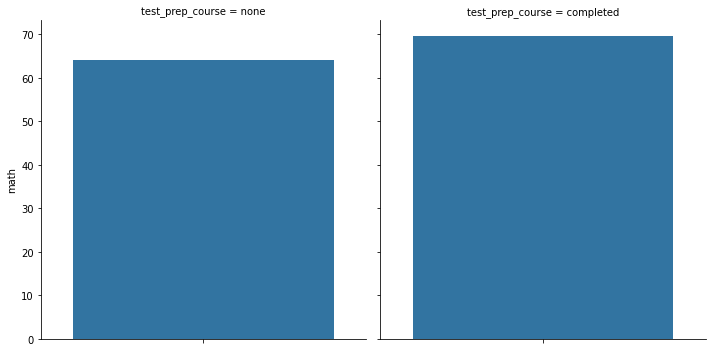

  * 11.0 % better on reading;

  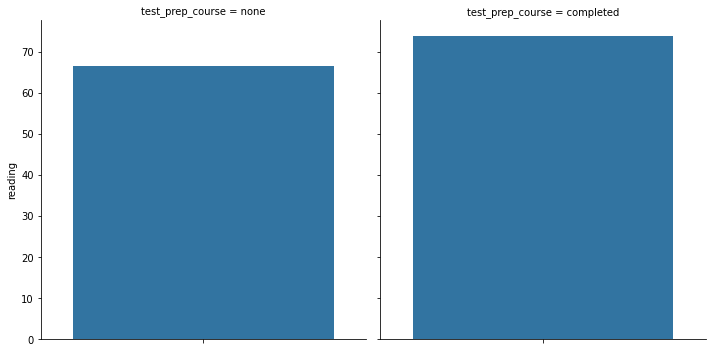

  * 15.0 % better on writing;

  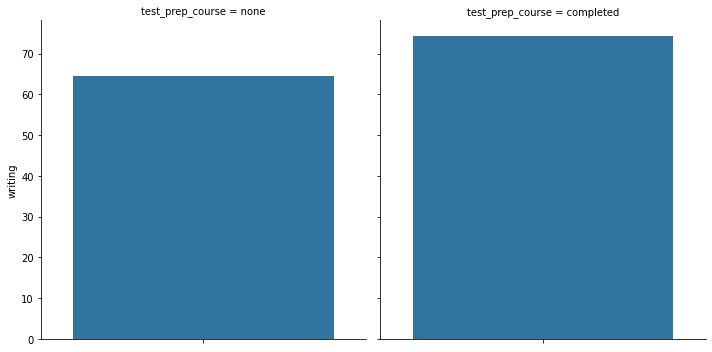
  
  * 12.0 % better on average.

  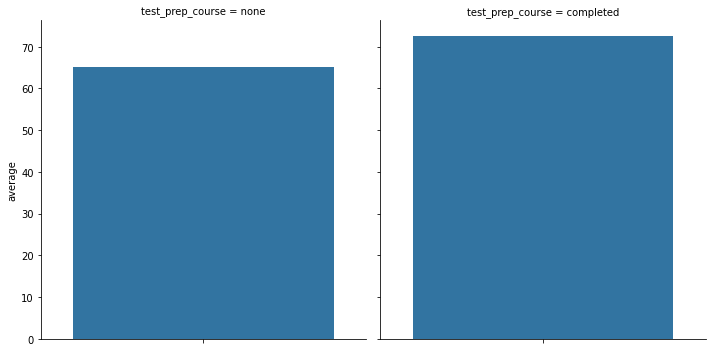

  * This suggests that the prep courses can to increase the students performance in 12% on average

*   Students whose parents have higher degrees performed better overrall

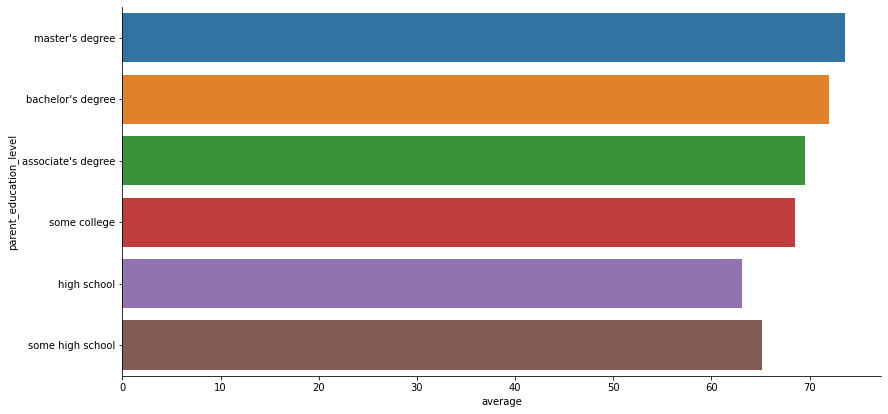

*  The gap in performance between students with more educated parents and ones with less educated parents diminishes if the students take the prep course

  * This is specially true if the student parent had at least some college education

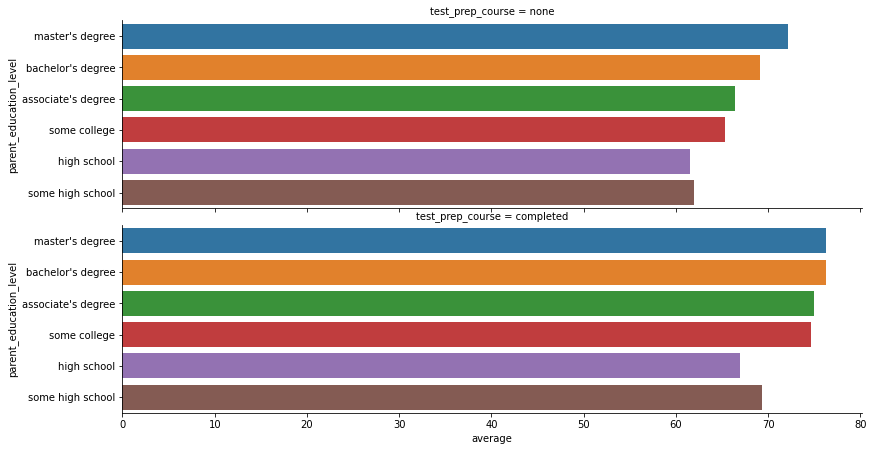



* The scores in general are highly correlated, however the scores of reading and writing have a stronger correlation

  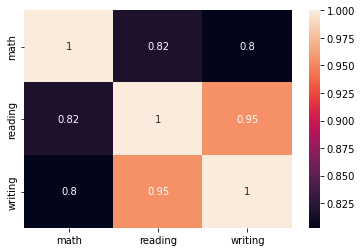

  * The positive correlation means that students tend to have a very similar score in reading and writing



* Students who chose the standard lunch option performed 14 % better on average


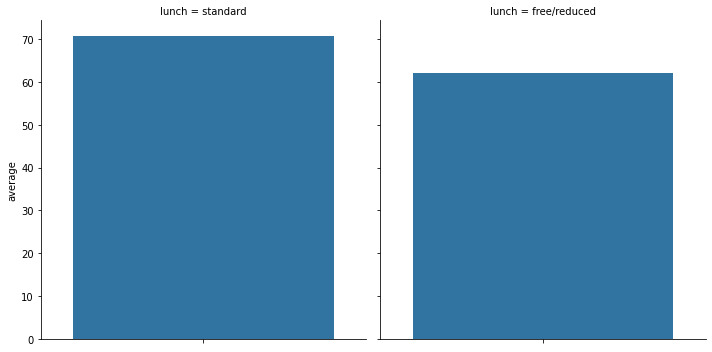


* Students from specific ethnic groups performed better than others

  * Students from the best perfoming group, Group E, had scores that were, on average, 15 % higher than the worse performing group, Group A

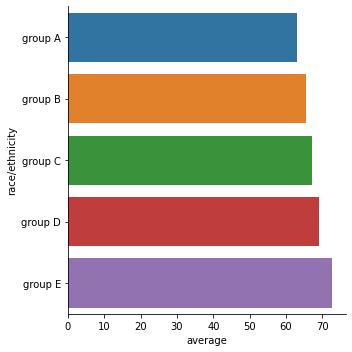


* Female students performed better than male students on average

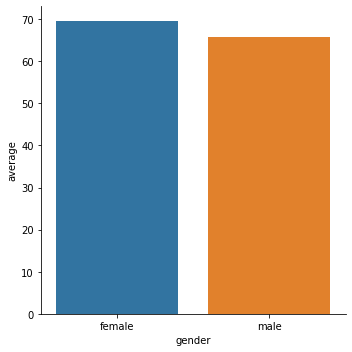


* However, when we break the data down. We can see that female students performed better in reading and writing, the male students performed better in math.



  * Reading

  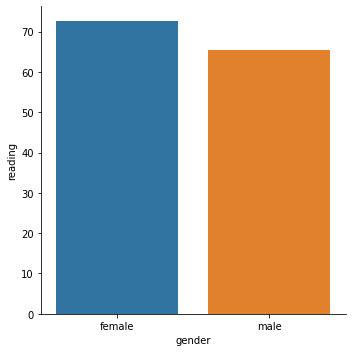


  * Writing

  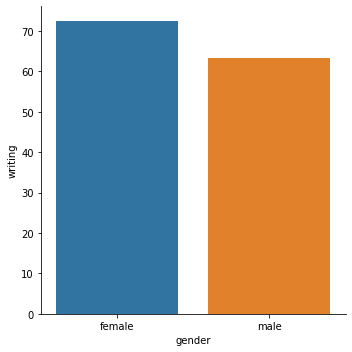

  * Math

  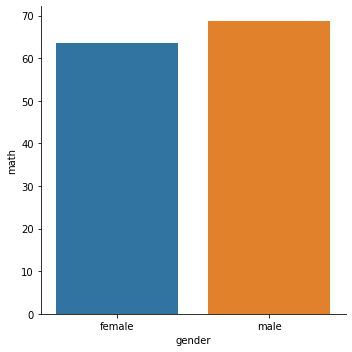

**Recommendations**

* Create incentives for students in general to enroll in the prep course

* Create incentives for students to enroll in the standard lunch option

* Create financial aid programs for students who come from ethinic/racial groups that underperformed

* Create financial aid programs for students whose parents had less education

* Reinforce math classes for female students or increase the number of math classes for female students that are struggling with the subject

* Reinforce reading/writing classes for male students or increase the number of reading/writing classes for male students that are struggling with these subjects

  * Since reading and writing scores are highly correlated, it's likely that the reinforcement of one the subject increases the score of the other subject aswell.

##Code

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [ ]:
df = pd.read_csv('exams.csv')
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
#Creates the average column

df['average'] = df[['math', 'reading', 'writing']].mean(axis= 1)

df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
# Calculates the average scores of students who took prep courses with students that didn't take prep courses

prep_noprep_all = df.groupby('test_prep_course')[['math', 'reading', 'writing' , 'average']].mean()

In [ ]:
# Calculates the difference in scores

for i in prep_noprep_all.columns:
  
  a = ((prep_noprep_all[i]['completed'] / prep_noprep_all[i]['none']) - 1) * 100 # how students performed better or worse

  print(f'students who completed the prep course performed {a.round()} % better on {i}')

students who completed the prep course performed 9.0 % better on math
students who completed the prep course performed 11.0 % better on reading
students who completed the prep course performed 15.0 % better on writing
students who completed the prep course performed 12.0 % better on average


In [ ]:
prep_noprep_all

,math,reading,writing,average
test_prep_course,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


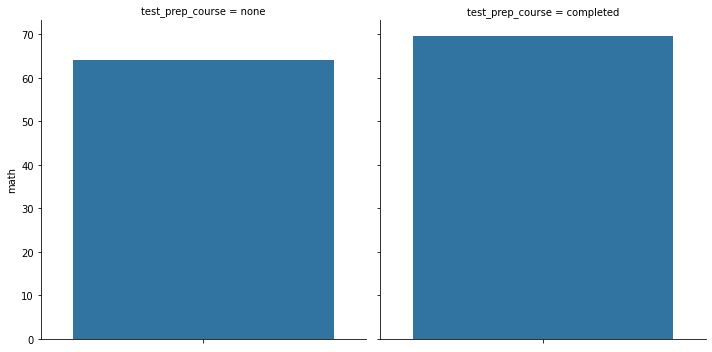

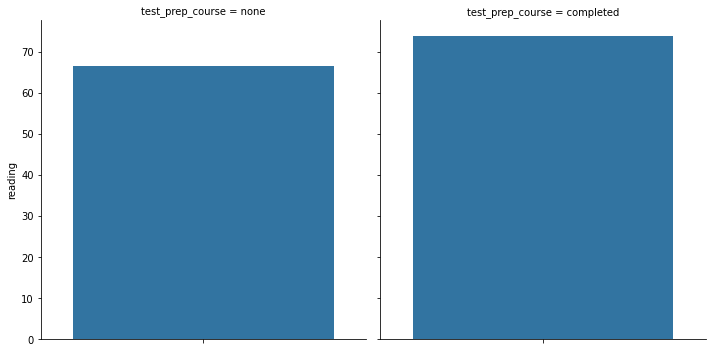

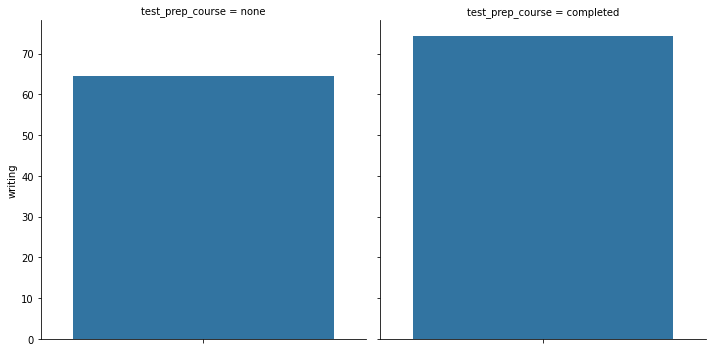

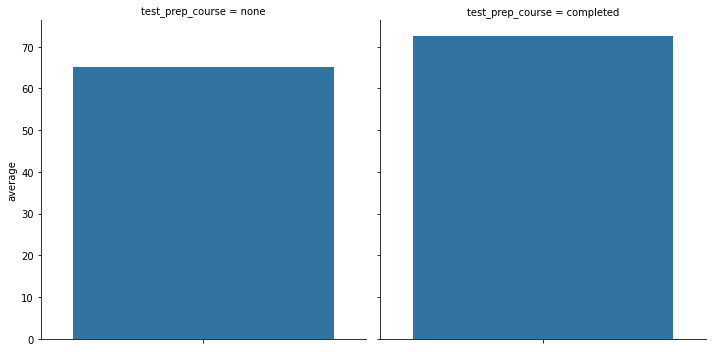

In [ ]:
sns.catplot(y='math', col='test_prep_course', data=df, kind = 'bar', ci = None);
sns.catplot(y='reading', col='test_prep_course', data=df, kind = 'bar', ci = None);
sns.catplot(y='writing', col='test_prep_course', data=df, kind = 'bar', ci = None);
sns.catplot(y='average', col='test_prep_course', data=df, kind = 'bar', ci = None);



In [ ]:
parent_ed_level = df.groupby('parent_education_level')[['math','reading', 'writing', 'average']].mean()
parent_ed_level

,math,reading,writing,average
parent_education_level,,,,
associate's degree,67.882883,70.927928,69.896396,69.569069
bachelor's degree,69.389831,73.000000,73.381356,71.923729
high school,62.137755,64.704082,62.448980,63.096939
master's degree,69.745763,75.372881,75.677966,73.598870
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007


In [ ]:
# The order in which the parent's education level should be displayed on the plots

order_ed = ["master's degree", "bachelor's degree", "associate's degree", "some college", "high school", "some high school"]



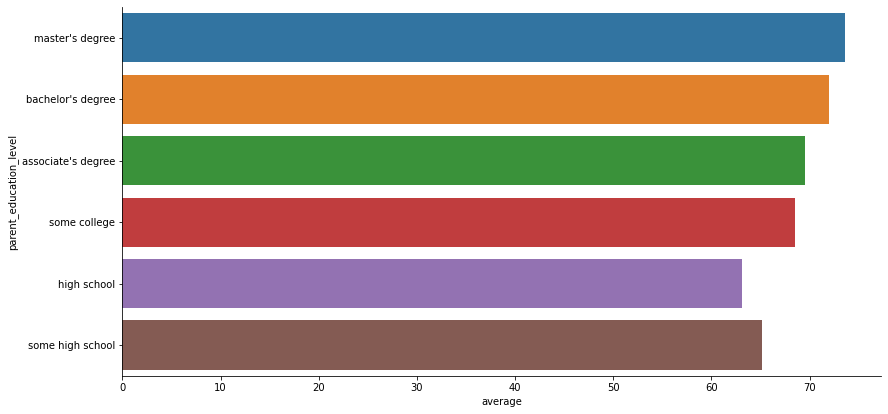

In [ ]:
# Plots the average scores of the students taking that parents level of education in consideration
f = sns.catplot(x='average', y='parent_education_level', data=df, order= order_ed, kind = 'bar', ci = None)

f.fig.set_size_inches(17,6)


Faceted Plots

In [ ]:
# Creates a Data Frame with all the students that completed the test prep course

df_prep_comp = df.copy()
df_prep_comp = df_prep_comp[df_prep_comp['test_prep_course'] == 'completed']
df_prep_comp.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing,average
1,female,group C,some college,standard,completed,69,90,88,82.333333
6,female,group B,some college,standard,completed,88,95,92,91.666667
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000
13,male,group A,some college,standard,completed,78,72,70,73.333333
18,male,group C,master's degree,free/reduced,completed,46,42,46,44.666667


In [ ]:
df_prep_comp.groupby('parent_education_level')[['average']].mean()

,average
parent_education_level,
associate's degree,74.939024
bachelor's degree,76.239130
high school,66.964286
master's degree,76.316667
some college,74.653680
some high school,69.337662


In [ ]:
# Creates a Data Frame with all the students that didn't complete the test prep course


df_prep_none = df.copy()
df_prep_none = df_prep_none[df_prep_none['test_prep_course'] == 'none']
df_prep_none.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,77.333333


In [ ]:
df_prep_none.groupby('parent_education_level')[['average']].mean()

,average
parent_education_level,
associate's degree,66.423810
bachelor's degree,69.166667
high school,61.550000
master's degree,72.205128
some college,65.284116
some high school,61.915033


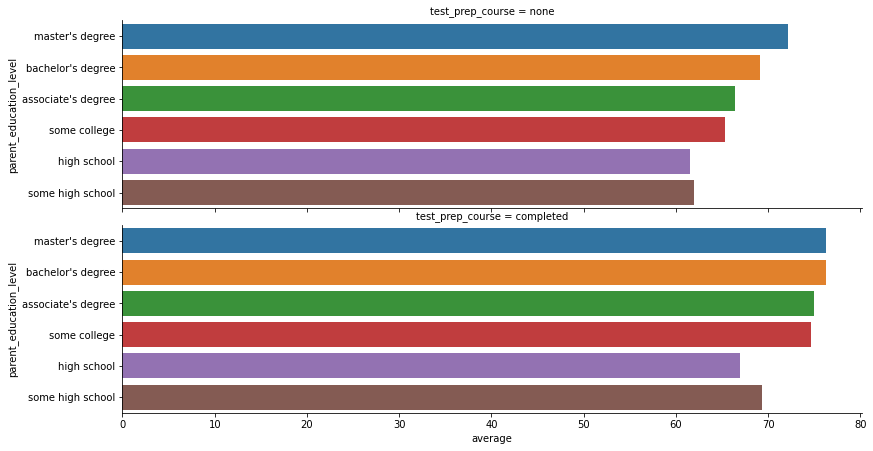

In [ ]:
# Plots the scores of the students, taking in consideration the parent`s level of education and if they comppleted the prep course or not

g = sns.catplot(x='average', y='parent_education_level', row='test_prep_course', data=df, kind = 'bar', order = order_ed, ci = None);

g.fig.set_size_inches(17,6)



Correlations

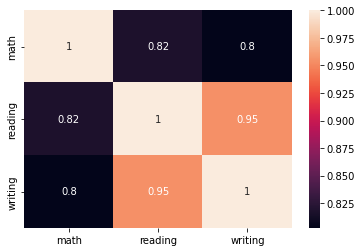

In [ ]:
# Plots a correlation heatmap, between each score

h = sns.heatmap(df[['math', 'reading', 'writing']].corr(), annot = True);


Lunch Variable

In [ ]:
#Groups by the students that receives free/reduced or standard lunch

df_lunch = df.groupby('lunch').mean()
df_lunch

,math,reading,writing,average
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,62.199061
standard,70.034109,71.654264,70.823256,70.837209


In [ ]:
# Calculates the difference in performance of students who had the standard lunch option
lunch_dif = ((df_lunch.iloc[1, 3] / df_lunch.iloc[0, 3]) - 1) * 100
lunch_dif.round()

14.0

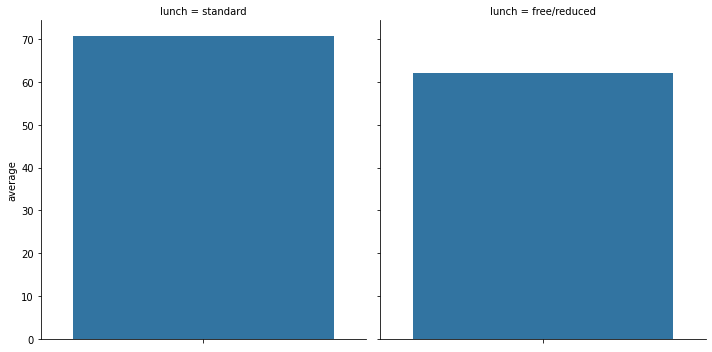

In [ ]:
# Plots the difference in performance bettween students that had the standard lunch option 
# and the ones that had the free/reduced

sns.catplot(y = 'average', col = 'lunch', data = df, kind = 'bar', ci = None);

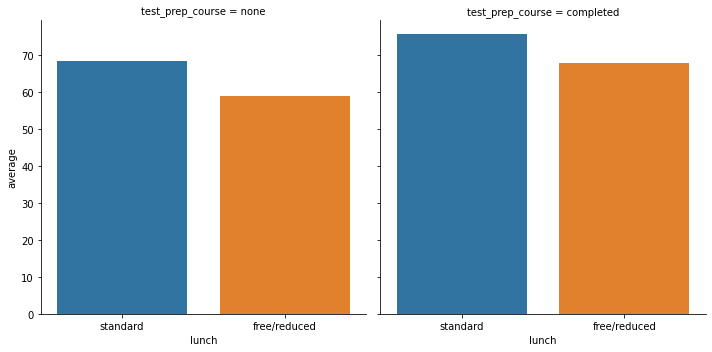

In [ ]:
sns.catplot(x = 'lunch', y = 'average', data = df, col='test_prep_course', kind = 'bar', ci = None);

In [ ]:
df_lunch_prep = df.groupby(['test_prep_course', 'lunch']).mean()
df_lunch_prep

math    reading    writing    average
test_prep_course lunch                                                   
completed        free/reduced  63.045802  69.870229  70.351145  67.755725
                 standard      73.533040  76.215859  76.766520  75.505140
none             free/reduced  56.508929  61.602679  58.736607  58.949405
                 standard      68.133971  69.177033  67.595694  68.302233

In [ ]:
(df_lunch_prep.iloc[1, 3] / df_lunch_prep.iloc[0, 3]) - 1

0.11437283400137255

Race/Ethnicity Variable

In [ ]:
# Groups the data by ethnic groups 
df_race = df.groupby('race/ethnicity').mean()
df_race

,math,reading,writing,average
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,62.992509
group B,63.452632,67.352632,65.600000,65.468421
group C,64.463950,69.103448,67.827586,67.131661
group D,67.362595,70.030534,70.145038,69.179389
group E,73.821429,73.028571,71.407143,72.752381


In [ ]:
#Calculates the difference in performance between the best performing group and the worst performing group

race_dif = ((df_race.iloc[4, 3] / df_race.iloc[0, 3]) - 1) * 100
race_dif.round()

15.0

In [ ]:
#Groups the data by ethnic groups and students who did the prep
df.groupby(['test_prep_course' ,'race/ethnicity']).mean()

math    reading    writing    average
test_prep_course race/ethnicity                                            
completed        group A         68.258065  71.032258  70.903226  70.064516
                 group B         67.191176  72.852941  71.882353  70.642157
                 group C         67.495726  73.658120  74.452991  71.868946
                 group D         69.792683  74.146341  76.658537  73.532520
                 group E         77.433333  76.666667  75.983333  76.694444
none             group A         58.086207  61.275862  58.275862  59.212644
                 group B         61.368852  64.286885  62.098361  62.584699
                 group C         62.707921  66.465347  63.990099  64.387789
                 group D         66.255556  68.155556  67.177778  67.196296
                 group E         71.112500  70.300000  67.975000  69.795833

In [ ]:
#Orders ethnicity in alphabetic order
order_et = ['group A' , 'group B' , 'group C' , 'group D' , 'group E']

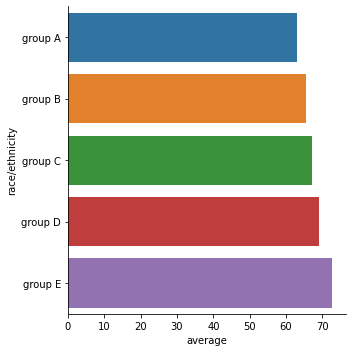

In [ ]:
# Plots the performance based on the ethnicity

sns.catplot(x = 'average', y = 'race/ethnicity', data = df, ci = None , kind = 'bar', order = order_et);

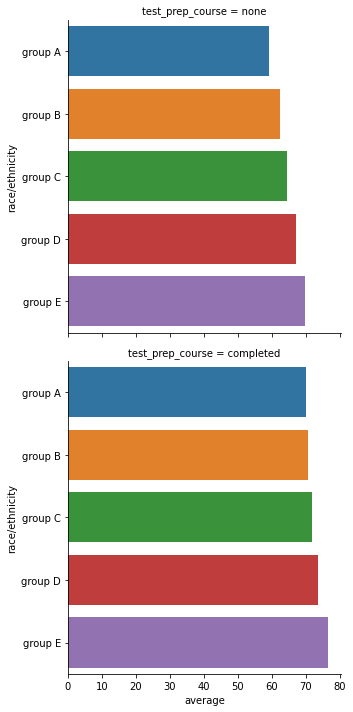

In [ ]:
# Plots the data looking at the different performance between ethnic groups and wheter they
# Did the prep course or not

sns.catplot(x = 'average', y = 'race/ethnicity', row = 'test_prep_course', data = df, ci = None , kind = 'bar', order = order_et);

In [ ]:
# groups the scores by gender
df.groupby('gender').mean()

,math,reading,writing,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [ ]:
# groups the scores by gender and wheter they did the prep course or not

df.groupby(['test_prep_course', 'gender']).mean()

math    reading    writing    average
test_prep_course gender                                            
completed        female  67.195652  77.375000  78.793478  74.454710
                 male    72.339080  70.212644  69.793103  70.781609
none             female  61.670659  69.982036  68.982036  66.878244
                 male    66.688312  62.795455  59.649351  63.044372

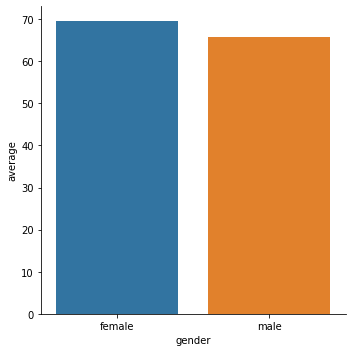

In [ ]:
#plots the average performance by gender

sns.catplot(y = 'average', x = 'gender', data = df, kind = 'bar', ci = None);

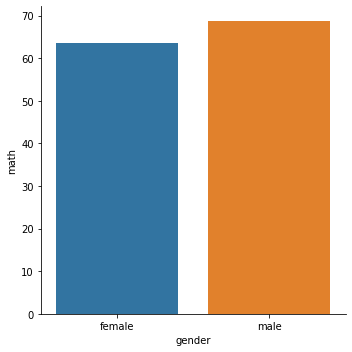

In [ ]:
#plots math performance by gender


sns.catplot(y = 'math', x = 'gender', data = df, kind = 'bar', ci = None);

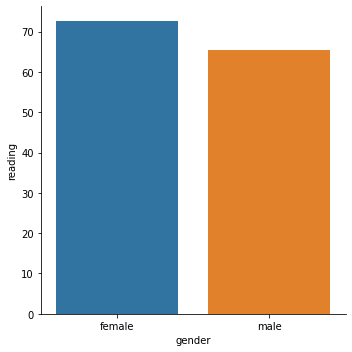

In [ ]:
#plots reading performance by gender


sns.catplot(y = 'reading', x = 'gender', data = df, kind = 'bar', ci = None);

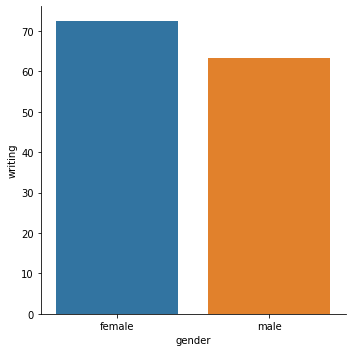

In [ ]:
#plots writing performance by gender


sns.catplot(y = 'writing', x = 'gender', data = df, kind = 'bar', ci = None);

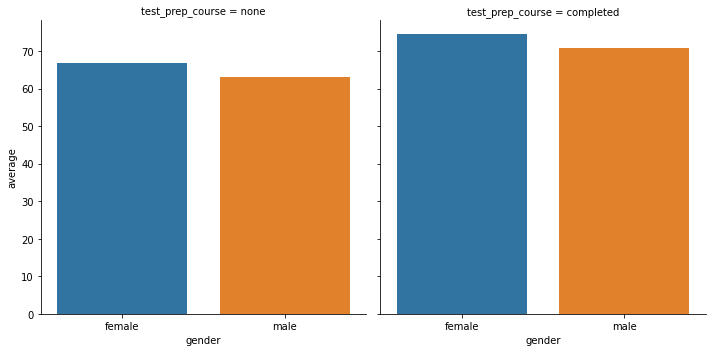

In [ ]:
# Plots the scores by gender and wheter they did the prep course or not

sns.catplot(y = 'average', x = 'gender', col = 'test_prep_course', data = df, kind = 'bar', ci = None);